In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import sys
df_recording = pd.read_csv('./InD_dataset/01_recordingMeta.csv',nrows=64000, delimiter=',')
df_recording.info()

/Users/dsharma308/miniconda3/envs/capstone/lib/python3.11/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recordingId     1 non-null      int64  
 1   locationId      1 non-null      int64  
 2   frameRate       1 non-null      float64
 3   speedLimit      1 non-null      float64
 4   weekday         1 non-null      object 
 5   startTime       1 non-null      int64  
 6   duration        1 non-null      float64
 7   numTracks       1 non-null      int64  
 8   numVehicles     1 non-null      int64  
 9   numVRUs         1 non-null      int64  
 10  latLocation     1 non-null      float64
 11  lonLocation     1 non-null      float64
 12  xUtmOrigin      1 non-null      float64
 13  yUtmOrigin      1 non-null      float64
 14  orthoPxToMeter  1 non-null      float64
dtypes: float64(8), int64(6), object(1)
memory usage: 252.0+ bytes


### Recording Meta
<p class="has-line-data" data-line-start="0" data-line-end="13">This DataFrame contains information about the recording, such as the recording ID, location ID, frame rate, speed limit, weekday, start time, duration, number of tracks, number of vehicles, number of VRUs, latitude and longitude of the location, and the UTM origin.<br>
The recording ID is a unique identifier for the recording.<br>
The location ID is a unique identifier for the location where the recording was made.<br>
The frame rate is the number of frames per second that were recorded.<br>
The speed limit is the maximum speed allowed in the area where the recording was made.<br>
The weekday is the day of the week on which the recording was made.<br>
The start time is the time at which the recording started.<br>
The duration is the length of the recording in seconds.<br>
The number of tracks is the number of tracks in the recording.<br>
The number of vehicles is the number of vehicles that were detected in the recording.<br>
The number of VRUs is the number of vulnerable road users (VRUs) that were detected in the recording.<br>
The latitude and longitude of the location are the coordinates of the location where the recording was made.<br>
The UTM origin is the UTM coordinates of the origin of the map projection used in the recording.</p>


In [2]:
df_track_info = pd.read_csv('./InD_dataset/01_tracks.csv',nrows=64000, delimiter=',')
df_track_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recordingId      64000 non-null  int64  
 1   trackId          64000 non-null  int64  
 2   frame            64000 non-null  int64  
 3   trackLifetime    64000 non-null  int64  
 4   xCenter          64000 non-null  float64
 5   yCenter          64000 non-null  float64
 6   heading          64000 non-null  float64
 7   width            64000 non-null  float64
 8   length           64000 non-null  float64
 9   xVelocity        64000 non-null  float64
 10  yVelocity        64000 non-null  float64
 11  xAcceleration    64000 non-null  float64
 12  yAcceleration    64000 non-null  float64
 13  lonVelocity      64000 non-null  float64
 14  latVelocity      64000 non-null  float64
 15  lonAcceleration  64000 non-null  float64
 16  latAcceleration  64000 non-null  float64
dtypes: float64(1

### Track Data
<p class="has-line-data" data-line-start="0" data-line-end="17">This DataFrame contains information about each vehicle in the recording, such as the recording ID, track ID, frame, track lifetime, x-center, y-center, heading, width, length, x-velocity, y-velocity, x-acceleration, y-acceleration, longitude velocity, latitude velocity, longitude acceleration, and latitude acceleration.<br>
The recording ID and track ID are the same as the recording ID and track ID in the track.csv DataFrame.<br>
The frame is the frame number in which the vehicle was detected.<br>
The track lifetime is the number of frames for which the vehicle was detected.<br>
The x-center is the x-coordinate of the center of the vehicle.<br>
The y-center is the y-coordinate of the center of the vehicle.<br>
The heading is the heading of the vehicle in degrees.<br>
The width is the width of the vehicle in meters.<br>
The length is the length of the vehicle in meters.<br>
The x-velocity is the x-component of the velocity of the vehicle in meters per second.<br>
The y-velocity is the y-component of the velocity of the vehicle in meters per second.<br>
The x-acceleration is the x-component of the acceleration of the vehicle in meters per second squared.<br>
The y-acceleration is the y-component of the acceleration of the vehicle in meters per second squared.<br>
The longitude velocity is the longitude component of the velocity of the vehicle in meters per second.<br>
The latitude velocity is the latitude component of the velocity of the vehicle in meters per second.<br>
The longitude acceleration is the longitude component of the acceleration of the vehicle in meters per second squared.<br>
The latitude acceleration is the latitude component of the acceleration of the vehicle in meters per second squared.</p>

In [3]:
df_frame_info = pd.read_csv('./InD_dataset/01_tracksMeta.csv', nrows=64000, delimiter=',')
df_frame_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recordingId   385 non-null    int64  
 1   trackId       385 non-null    int64  
 2   initialFrame  385 non-null    int64  
 3   finalFrame    385 non-null    int64  
 4   numFrames     385 non-null    int64  
 5   width         385 non-null    float64
 6   length        385 non-null    float64
 7   class         385 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 24.2+ KB


### Tracks Meta
<p class="has-line-data" data-line-start="0" data-line-end="8">recording_id : A unique identifier for the recording.<br>
track_id : A unique identifier for the track.<br>
initial_frame : The frame number in which the track was first detected.<br>
final_frame : The frame number in which the track was last detected.<br>
num_frames : The number of frames for which the track was detected.<br>
width : The width of the track in meters.<br>
length : The length of the track in meters.<br>
class : The class of the track. The possible values are truck_bus, car, pedestrian, and cyclist.</p>

<p class="has-line-data" data-line-start="1" data-line-end="2">The following columns are common in all three DataFrames:</p>
<p class="has-line-data" data-line-start="3" data-line-end="6">recording_id<br>
track_id<br>
These columns are related to the tracks that were detected in the recordings. The recording_id column is a unique identifier for the recording. The track_id column is a unique identifier for the track.</p>

They likely represent different aspects of the same dataset, with the first dataframe providing general recording information, the second dataframe providing detailed information about individual tracks, and the third dataframe potentially providing further details or annotations for those tracks.

To fully understand how these dataframes are related and perform any meaningful analysis, we would need to join or merge them based on the common columns, specifically "recordingId" and "trackId." Depending on the analysis we want to perform, we can use these relationships to gain insights into the recorded data and track characteristics.

In [4]:
import pandas as pd


# Merge the first and second dataframes based on 'recordingId'
merged_df = pd.merge(df_recording, df_track_info, on='recordingId', how='inner')

# Merge the merged_df and the third dataframe based on 'recordingId' and 'trackId'
final_merged_df = pd.merge(merged_df, df_frame_info, on=['recordingId', 'trackId'], how='inner')

In [5]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recordingId      64000 non-null  int64  
 1   locationId       64000 non-null  int64  
 2   frameRate        64000 non-null  float64
 3   speedLimit       64000 non-null  float64
 4   weekday          64000 non-null  object 
 5   startTime        64000 non-null  int64  
 6   duration         64000 non-null  float64
 7   numTracks        64000 non-null  int64  
 8   numVehicles      64000 non-null  int64  
 9   numVRUs          64000 non-null  int64  
 10  latLocation      64000 non-null  float64
 11  lonLocation      64000 non-null  float64
 12  xUtmOrigin       64000 non-null  float64
 13  yUtmOrigin       64000 non-null  float64
 14  orthoPxToMeter   64000 non-null  float64
 15  trackId          64000 non-null  int64  
 16  frame            64000 non-null  int64  
 17  trackLifetim

The resulting dataframe final_merged_df now contains all the columns from the three original dataframes, and it has a total of 37 columns.

In [6]:
final_merged_df

,recordingId,locationId,frameRate,speedLimit,weekday,startTime,duration,numTracks,numVehicles,numVRUs,...,lonVelocity,latVelocity,lonAcceleration,latAcceleration,initialFrame,finalFrame,numFrames,width_y,length_y,class
0,1,4,25.0,13.88889,tuesday,15,1032.32,385,355,30,...,8.45598,0.00024,0.33811,0.07776,0,286,287,1.87348,4.76888,car
1,1,4,25.0,13.88889,tuesday,15,1032.32,385,355,30,...,8.48115,-0.00652,0.32596,0.08420,0,286,287,1.87348,4.76888,car
2,1,4,25.0,13.88889,tuesday,15,1032.32,385,355,30,...,8.50615,-0.01185,0.30201,0.09211,0,286,287,1.87348,4.76888,car
3,1,4,25.0,13.88889,tuesday,15,1032.32,385,355,30,...,8.52987,-0.01594,0.26626,0.10052,0,286,287,1.87348,4.76888,car
4,1,4,25.0,13.88889,tuesday,15,1032.32,385,355,30,...,8.55072,-0.01862,0.21959,0.10868,0,286,287,1.87348,4.76888,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,1,4,25.0,13.88889,tuesday,15,1032.32,385,355,30,...,-0.00000,-0.00000,-0.00000,-0.00000,0,25807,25808,2.10238,5.07117,car
63996,1,4,25.0,13.88889,tuesday,15,1032.32,385,355,30,...,-0.00000,-0.00000,-0.00000,-0.00000,0,25807,25808,2.10238,5.07117,car
63997,1,4,25.0,13.88889,tuesday,15,1032.32,385,355,30,...,-0.00000,-0.00000,-0.00000,-0.00000,0,25807,25808,2.10238,5.07117,car
63998,1,4,25.0,13.88889,tuesday,15,1032.32,385,355,30,...,-0.00000,-0.00000,-0.00000,-0.00000,0,25807,25808,2.10238,5.07117,car


In [7]:
final_merged_df.to_csv('final_merged_data_1.csv', index=False)

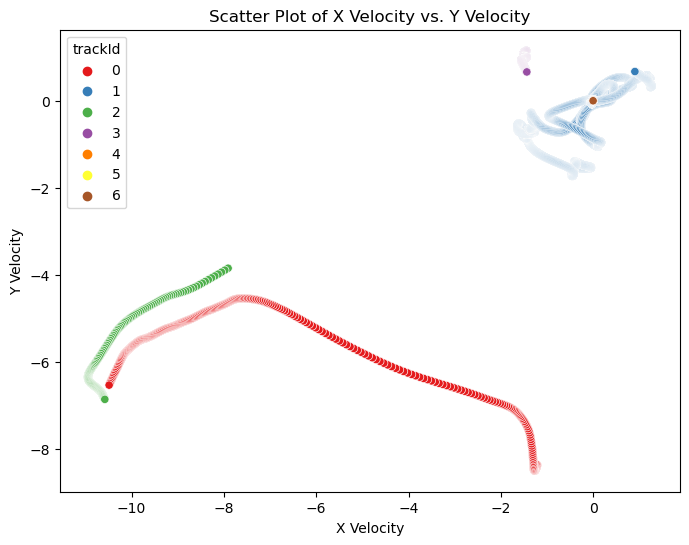

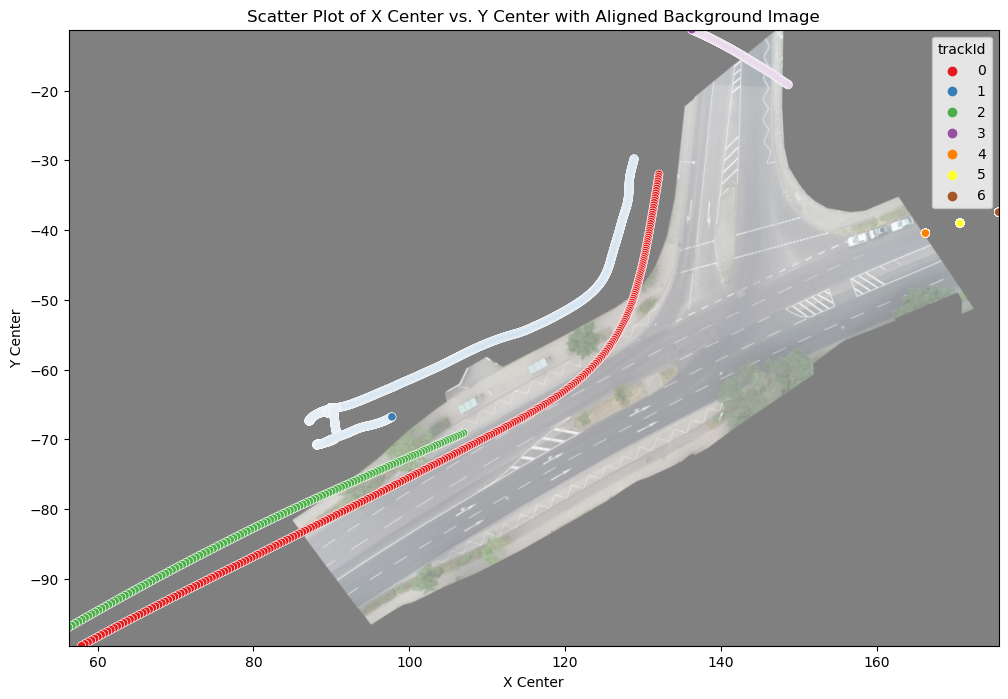

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 
#Create a scatter plot of 'xVelocity' vs. 'yVelocity'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='xVelocity', y='yVelocity', data=final_merged_df, hue='trackId', palette='Set1')
plt.title('Scatter Plot of X Velocity vs. Y Velocity')
plt.xlabel('X Velocity')
plt.ylabel('Y Velocity')
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import NumPy for image manipulation

# Create a scatter plot of 'xVelocity' vs. 'yVelocity'
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import NumPy for image manipulation

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Create a scatter plot of 'xVelocity' vs. 'yVelocity'
plt.figure(figsize=(12, 8))

# Load the background image
background_image = plt.imread('./InD_dataset/01_background.png')

# Extract x and y values from the dataframe
x = final_merged_df['xCenter']
y = final_merged_df['yCenter']

# Calculate the extent based on the min and max coordinates of the tracks
extent = [x.min(), x.max(), y.min(), y.max()]

# Create the scatter plot
plt.imshow(background_image, extent=extent, aspect='auto', alpha=0.5)
sns.scatterplot(x=x, y=y, data=final_merged_df, hue='trackId', palette='Set1')

# Set plot title and labels
plt.title('Scatter Plot of X Center vs. Y Center with Aligned Background Image')
plt.xlabel('X Center')
plt.ylabel('Y Center')

# Show the plot
plt.show()



![Drag Racing](./InD_dataset/00_background.png)

## K-means clustering
K-means clustering is an unsupervised machine learning algorithm that groups similar data points together. The algorithm requires the user to choose the number of clusters (K) they want to group their data into. The algorithm then randomly initializes K centroids, which are the centers of the clusters. Next, the algorithm assigns each data point to the nearest centroid and updates the centroids to be the average of all the data points assigned to them. This process is repeated until the centroids no longer change, and the algorithm returns the final clusters, which are the groups of data points that are closest to each centroid.
K-means clustering can be used for a variety of tasks, such as image segmentation, customer segmentation, and market research. However, it is important to note that the algorithm is sensitive to the choice of K. If you choose too many clusters, the algorithm may overfit the data and produce clusters that are not meaningful. If you choose too few clusters, the algorithm may not be able to capture the natural structure of the data.
To better understand K-means clustering, imagine you have a basket of fruit and you want to group the fruit together by type. You could use K-means clustering to do this. First, you would need to choose the number of clusters (K). Let's say you choose K=3. The algorithm will then randomly initialize 3 centroids. Next, the algorithm will assign each piece of fruit to the nearest centroid. For example, all the apples will be assigned to the same centroid, all the oranges will be assigned to another centroid, and all the bananas will be assigned to the third centroid. The algorithm will then update the centroids to be the average of all the fruit assigned to them. This process is repeated until the centroids no longer change, and the algorithm returns the final clusters, which are the groups of fruit that are closest to each centroid.
There are several implementations of K-means clustering available, including Torch, Weka, and Python. However, choosing the optimal number of clusters is a big task, and the performance of the algorithm depends on highly efficient clusters that it forms.

### Load the data: 
The first step is to load the data into a Pandas DataFrame.
### Select relevant features: 
The next step is to select the relevant features for clustering. In this case, the features selected are frameRate, speedLimit, duration, xVelocity, yVelocity, xAcceleration, and yAcceleration.
### Standardize the features:
Standardization is a preprocessing technique that scales the features to have a mean of 0 and a standard deviation of 1. This is important for K-means clustering because it makes the algorithm less sensitive to the scale of the features.
### Choose the number of clusters (K): 
The next step is to choose the number of clusters (K) that you want to group your data into. In this case, the number of clusters chosen is 3 (Random).
#### One way to choose cluster:
Elbow clustering is a heuristic method for determining the optimal number of clusters (K) in K-means clustering. It works by plotting the within-cluster sum of squares (WCSS) as a function of K. The WCSS is the sum of the squared distances between each data point and its assigned cluster centroid.

As the number of clusters increases, the WCSS will decrease. This is because the algorithm will be able to group the data into more specific clusters, which will reduce the average distance between each data point and its cluster centroid.

However, at a certain point, the WCSS will start to decrease more slowly. This is known as the elbow point. The elbow point is the point where adding another cluster does not significantly reduce the WCSS.

To determine the optimal number of clusters, we can look for the elbow point in the WCSS plot. The number of clusters at the elbow point is the optimal number of clusters for the data.
Elbow clustering is a simple and effective method for determining the optimal number of clusters in K-means clustering. However, it is important to note that it is not a perfect method. In some cases, the elbow point may not be clear or it may be difficult to determine. Additionally, elbow clustering is only suitable for K-means clustering. It cannot be used with other clustering algorithms.

Here are some of the advantages and disadvantages of elbow clustering:

Advantages:

Simple and easy to understand
Effective in determining the optimal number of clusters in K-means clustering
Disadvantages:

Not a perfect method and the elbow point may not always be clear
Only suitable for K-means clustering
Overall, elbow clustering is a useful heuristic method for determining the optimal number of clusters in K-means clustering. It is a good starting point for most clustering tasks.
### Apply K-Means clustering:
The K-Means clustering algorithm is then applied to the standardized features. This will assign each data point to one of the 3 clusters.
### Add the cluster labels to the DataFrame: 
The cluster labels are then added to the DataFrame as a new column called cluster.
Visualize the clustered data: The last step is to visualize the clustered data using a scatter plot. The color of each data point in the scatter plot will represent the cluster that it belongs to.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recordingId      64000 non-null  int64  
 1   locationId       64000 non-null  int64  
 2   frameRate        64000 non-null  float64
 3   speedLimit       64000 non-null  float64
 4   weekday          64000 non-null  object 
 5   startTime        64000 non-null  int64  
 6   duration         64000 non-null  float64
 7   numTracks        64000 non-null  int64  
 8   numVehicles      64000 non-null  int64  
 9   numVRUs          64000 non-null  int64  
 10  latLocation      64000 non-null  float64
 11  lonLocation      64000 non-null  float64
 12  xUtmOrigin       64000 non-null  float64
 13  yUtmOrigin       64000 non-null  float64
 14  orthoPxToMeter   64000 non-null  float64
 15  trackId          64000 non-null  int64  
 16  frame            64000 non-null  int64  
 17  trackLifetim

/Users/dsharma308/miniconda3/envs/capstone/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


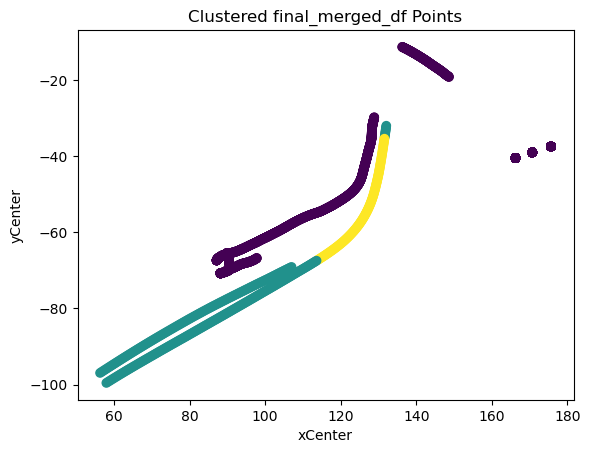

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your final_merged_df into a final_merged_dfFrame
final_merged_df.info()
# Select relevant features
#X = final_merged_df[['frameRate', 'speedLimit', 'duration', 'xCenter', 'yCenter']]
X = final_merged_df[[ 'frameRate', 'speedLimit', 'duration','xVelocity', 'yVelocity', 'xAcceleration', 'yAcceleration']]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (K)
k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
final_merged_df['cluster'] = kmeans.fit_predict(X_scaled)

import matplotlib.pyplot as plt

# Scatter plot with cluster coloring
plt.scatter(final_merged_df['xCenter'], final_merged_df['yCenter'], c=final_merged_df['cluster'], cmap='viridis')
plt.xlabel('xCenter')
plt.ylabel('yCenter')
plt.title('Clustered final_merged_df Points')
plt.show()

### Feature Selection
Selecting the right features for your data analysis or machine learning task is a crucial step, as it can significantly impact the quality and effectiveness of your results. Feature selection involves choosing a subset of the available features (columns) from your dataset that are most relevant or informative for the task at hand while eliminating irrelevant or redundant features. Work in progress